In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models as models
from torch.utils.data import DataLoader

import random
import os
import copy

import torch

import sys
sys.path.append("../../")

from src.model.TransferModel import run_style_transfer
from src.dataset.dataset import ImgDataset
from src.utils.other import *

# load stuff

In [64]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

In [65]:
league_dataset = ImgDataset("../../data/", imsize, device)

In [66]:
# https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
cnn = models.vgg19(pretrained=True).features.to(device).eval()

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [67]:
outfolder = "../../results/league_content_league_style_images_256/"
os.system("mkdir -p " + str(outfolder))

1

# Doing Random League Images for Content and Style

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 185.714127 Content Loss: 17.896250

run [100]:
Style Loss : 103.691154 Content Loss: 21.097149

run [150]:
Style Loss : 68.965767 Content Loss: 23.235430

run [200]:
Style Loss : 33.899483 Content Loss: 21.971764

run [250]:
Style Loss : 20.141094 Content Loss: 18.186844

run [300]:
Style Loss : 15.013161 Content Loss: 15.197630



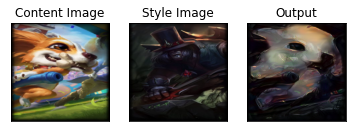

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 207.079605 Content Loss: 12.336375

run [100]:
Style Loss : 50.404285 Content Loss: 14.488795

run [150]:
Style Loss : 19.564152 Content Loss: 14.285195

run [200]:
Style Loss : 10.951576 Content Loss: 13.197947

run [250]:
Style Loss : 7.479563 Content Loss: 11.954851

run [300]:
Style Loss : 5.794016 Content Loss: 11.018439



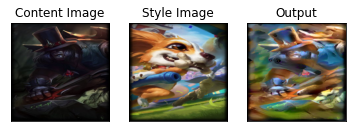

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 35.989616 Content Loss: 11.942877

run [100]:
Style Loss : 19.342529 Content Loss: 10.434467

run [150]:
Style Loss : 10.771059 Content Loss: 9.566920

run [200]:
Style Loss : 6.482307 Content Loss: 8.244052

run [250]:
Style Loss : 4.481353 Content Loss: 7.409110

run [300]:
Style Loss : 3.041418 Content Loss: 6.889793



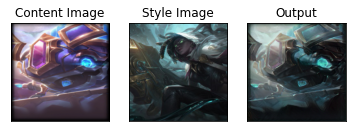

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 100.354973 Content Loss: 10.514999

run [100]:
Style Loss : 28.622555 Content Loss: 11.864480

run [150]:
Style Loss : 12.516945 Content Loss: 11.587734

run [200]:
Style Loss : 7.241287 Content Loss: 10.830893

run [250]:
Style Loss : 5.238707 Content Loss: 10.049843

run [300]:
Style Loss : 4.276407 Content Loss: 9.452610



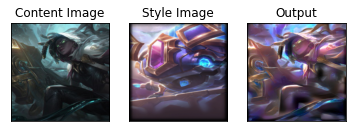

In [70]:
data_paths = os.listdir('../../data/')
data_paths.remove("traditional_style_images")

for i in range(0,30):
    
    content_index = random.randint(0, len(data_paths))
    style_index = random.randint(0, len(data_paths))
    
    
    content_img = league_dataset.load_image('../../data/' + data_paths[content_index], device)
    style_img = league_dataset.load_image('../../data/' + data_paths[style_index], device)

    # input
    input_img = content_img.clone()
    # run style transfer
    output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, style_img, input_img, num_steps=300,
                                do_print=True, device=device)
    
    fig, axes = plt.subplots(1, 3)
    for i in range(3):
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
    imshow(content_img, axes[0], "Content Image")
    imshow(style_img, axes[1], "Style Image")
    imshow(output, axes[2], "Output")
    plt.savefig(outfolder + data_paths[content_index].replace(".jpg","") + "_" + data_paths[style_index].replace(".jpg","") + ".jpg")
    plt.show()
    
    content_img = league_dataset.load_image('../../data/' + data_paths[style_index], device)
    style_img = league_dataset.load_image('../../data/' + data_paths[content_index], device)

    # input
    input_img = content_img.clone()
    # run style transfer
    output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, style_img, input_img, num_steps=300,
                                do_print=True, device=device)
    
    fig, axes = plt.subplots(1, 3)
    for i in range(3):
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
    imshow(content_img, axes[0], "Content Image")
    imshow(style_img, axes[1], "Style Image")
    imshow(output, axes[2], "Output")
    plt.savefig(outfolder + data_paths[style_index].replace(".jpg","") + "_" + data_paths[content_index].replace(".jpg","") + ".jpg")
    plt.show()